In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There are two data sets that are relevant for this project. The first contains information about businesses. The second contains review information of those businesses.
Documentation for these data sets can be found [here](https://www.yelp.com/dataset/documentation/main).

In [2]:
# assign variable to business data
b_data = '/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Project_1_Data/yelp_dataset/business.json'

# assign variable to review data
rev_data = '/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Project_1_Data/yelp_dataset/review.json'

# Explore and Clean Business Data #
Goals include:
1. Determine what kinds of businesses are included in the data.
2. Depending on results from 1, extract a subset of data that includes only restaurants.

In [3]:
# load business data as DataFrame
b_df = pd.read_json(b_data, lines=True)
b_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [4]:
b_df.shape

(192609, 14)

In [5]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


Since several of the columns are irrelevant for present purposes, I will remove them from the DataFrame and keep only those columns that will likely be relevant.

In [6]:
# remove irrelevant columns
b_df = b_df[['business_id', 'categories', 'review_count', 'stars']]
b_df.head()

,business_id,categories,review_count,stars
0,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",5,3.0
1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5
2,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",170,4.0
3,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",3,5.0
4,HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",4,4.0


In [7]:
b_df.categories[0]

'Golf, Active Life'

The most important finding is that there are business categories included in the data besides restaurants (see above), so I need to filter the categories to include only relevant ones.

First, let's try to get an idea of what categories are included in the data.

In [8]:
type(b_df.categories[0])

str

Since the values in the categories are strings with multiple categories included in each individual string, it will be helpful to reformat the values as lists of strings with each individual string representing a single category. This will allow us to (1) inspect the individual categories, and (2) count the number of each category to get an idea of how many of the businesses are restaurants.

In [9]:
# convert each string of categories to a list of strings
# with each string representing a single category
b_df['categories'] = b_df['categories'].str.split(pat = ', ')
b_df.categories.head()

0                                  [Golf, Active Life]
1    [Specialty Food, Restaurants, Dim Sum, Importe...
2                  [Sushi Bars, Restaurants, Japanese]
3                      [Insurance, Financial Services]
4    [Plumbing, Shopping, Local Services, Home Serv...
Name: categories, dtype: object

In [10]:
# count number of each category
cat_count = b_df['categories'].apply(pd.Series).stack().value_counts()
cat_count

Restaurants                  59371
Shopping                     31878
Food                         29989
Home Services                19729
Beauty & Spas                19370
Health & Medical             17171
Local Services               13932
Automotive                   13203
Nightlife                    13095
Bars                         11341
Event Planning & Services    10371
Active Life                   9521
Fashion                       7798
Sandwiches                    7332
Coffee & Tea                  7321
Fast Food                     7257
American (Traditional)        7107
Hair Salons                   6955
Pizza                         6804
Home & Garden                 6489
Arts & Entertainment          6304
Professional Services         6276
Auto Repair                   6140
Hotels & Travel               6033
Doctors                       5867
Real Estate                   5677
Burgers                       5404
Breakfast & Brunch            5381
Nail Salons         

In [11]:
cat_count.shape

(1300,)

It might be helpful to visualize the category counts, but since there are 1300 separate categories (see above) the visualization will probably be more helpful if we limit how many categories we visualize. Let's visualize the 50 most common categories.

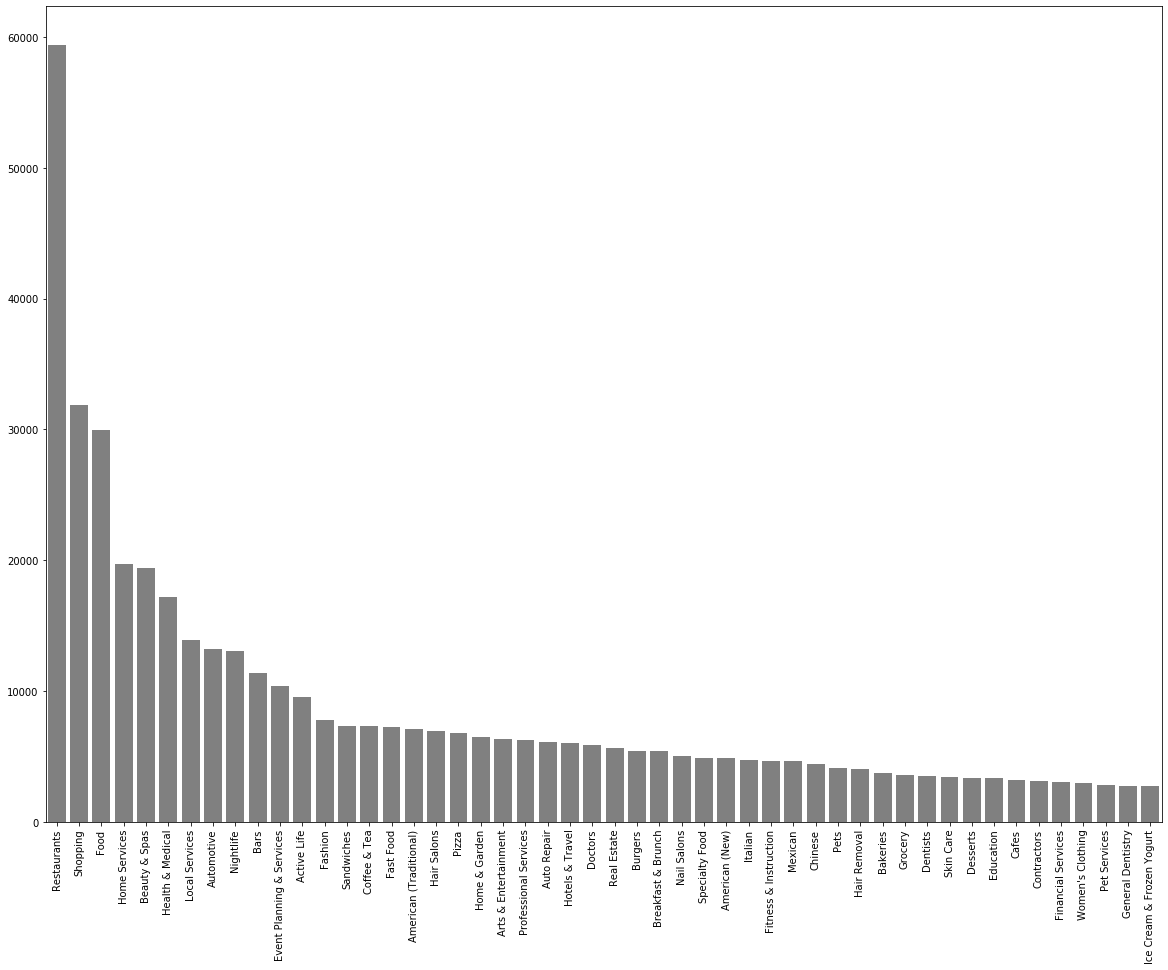

In [40]:
# construct bar plot of 50 most common categories
cat_count_plot = sns.barplot(cat_count.head(50).index, cat_count.head(50).values, color='gray')

# fix x-axis labels so they are readable
cat_count_plot.set_xticklabels(cat_count_plot.get_xticklabels(), rotation=90)

# plot the graph
cat_count_plot

The visualization clearly shows that there are many categories besides 'Restaurants'. I now want to construct a separate DataFrame composed only of the Restaurants data. To do this, I first need to check for and remove any null values in the 'categories' column because I cannot iterate through null values in the 'categories' column.

In [13]:
# check for null values in 'categories' column
print('There are {} null values in the categories column.'.format(pd.isna(b_df['categories']).sum()))

There are 482 null values in the categories column.


In [14]:
# remove any null values in 'categories' column
b_df = b_df.loc[~pd.isna(b_df['categories'])]

# check again for null values in 'categories' column
print('There are {} null values in the categories column.'.format(pd.isna(b_df['categories']).sum()))

There are 0 null values in the categories column.


In [15]:
# construct DataFrame composed only of businesses in the 'Restaurants' category
rest_df = b_df.loc[b_df['categories'].apply(lambda x: 'Restaurants' in x), :]

# verify that all remaining businesses are included in the category 'Restaurants'
for i in range(len(rest_df.categories)):
    if 'Restaurants' not in rest_df.categories.iloc[i]:
        print(rest_df.categories.iloc[i])
print('All businesses are restaurants.')

All businesses are restaurants.


In [16]:
rest_df.head()

,business_id,categories,review_count,stars
1,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",128,2.5
2,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]",170,4.0
11,1Dfx3zM-rW4n-31KeC8sJg,"[Restaurants, Breakfast & Brunch, Mexican, Tac...",18,3.0
13,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",16,4.0
17,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]",40,4.0


In [17]:
print(rest_df.shape)
print()
rest_df.info()

(59371, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59371 entries, 1 to 192603
Data columns (total 4 columns):
business_id     59371 non-null object
categories      59371 non-null object
review_count    59371 non-null int64
stars           59371 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


Note that the number of rows in our new DataFrame is the same as the 'Restaurants' count from above, which is what we wanted.

# Explore and Clean Review Data #
Goals Include:
1. Use the restricted business data set just created to extract relevant reviews from the review data set. We only want the reviews of restaurants.

Now that we have a DataFrame with the relevant businesses, it is time to extract the relevant reviews from the reviews data set. Since the original reviews data set is over 5 GB in size, filtering the reviews should also make the data set a more usable size.

First, I will construct an iterator to load the review data set in chunks so we don't have to hold the entire data set in memory.

In [18]:
# construct iterator to load review data in chunks
rev_it = pd.read_json(rev_data, lines=True, chunksize=100000)

Next, we can use the business_ids in the restaurants DataFrame constructed earlier to filter the review data. First, we need to isolate the business_ids as a list. Then we can use that list to filter the review data.

In [19]:
# isolate restaurant business ids as a list
rest_ids = rest_df['business_id'].values
rest_ids

array(['QXAEGFB4oINsVuTFxEYKFQ', 'gnKjwL_1w79qoiV3IC_xQQ',
       '1Dfx3zM-rW4n-31KeC8sJg', ..., 'h3QErqS3OZgLJ5Tb6-sLyQ',
       'KnafX7T6qSAmSrLhd709vA', 'p1eUTUB_5hf1enoKYBV3DA'], dtype=object)

Next, we use the rest_ids list to filter the review data.

In [20]:
%%time (took about 6 hrs, 20 mins to process)

# construct list composed of only and all restaurant reviews
rest_reviews = [rev.loc[rev['business_id'].apply(lambda x: x in rest_ids)] for rev in rev_it]


# %%time

# Here is another method worth trying:
# Found here: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
# rest_reviews = rev_it[rev_it['business_id'].isin(rest_ids)]

In [21]:
# turn restaurant reviews list into DataFrame
rest_reviews_df = pd.concat(rest_reviews)

In [22]:
# save restaurant reviews DataFrame to CSV file
rest_reviews_df.to_csv('restaurant_reviews1.csv', index=False)

In [57]:
rest_reviews = pd.read_csv('restaurant_reviews1.csv')
rest_reviews.head()

In [26]:
rest_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074505 entries, 0 to 4074504
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), int64(1), object(5)
memory usage: 279.8+ MB


We have now isolated the restaurant reviews, but there are some irrelevant columns that we need to remove.

In [48]:
# remove irrelevant columns
rest_reviews = rest_reviews[['business_id', 'stars', 'text']]
rest_reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,q3ilBINLR7KoBBlxSqCvlA,4.0,很不錯的港式茶餐廳，味道對。住附近的絕對可以一試。\n侍應態度都很好。\n午餐價錢$8 / ...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...


In [63]:
# re-save rest_reviews data with relevant columns to CSV file
rest_reviews.to_csv('restaurant_reviews2.csv', index=False)

We should now make sure there are no null or duplicate values in the rest_reviews DataFrame.

In [54]:
# check for null values
for v in rest_reviews.values:
    if pd.isna(v.any()):
        print(v)
print('There are no null values in the DataFrame.')

There are no null values in the DataFrame.


In [59]:
# check for duplicate values in 'business_id' and 'text' columns
print(any(rest_reviews.business_id.duplicated()))
print(any(rest_reviews.text.duplicated()))

True
True


It appears that there are duplicate values.
We should expect there to be duplicate values in the 'business_id' column since the data might contain multiple reviews for the same restaurant.
But there shouldn't be duplicates in the 'text' column, which contains the reviews. At least, there shouldn't be duplicates for the same business_id (strictly speaking, the same review could be given for different restaurants). I suppose it is possible that two different reviewers could write identical reviews for the same business, but this is highly unlikely and shouldn't make a difference for present purposes.
Before removing the duplicates, we should check how many there are.

In [77]:
# Count number of duplicates by row
print('There are {} duplicate rows in the DataFrame.'.format(len(rest_reviews)-len(rest_reviews.drop_duplicates())))

There are 7222 duplicate rows in the DataFrame.


In [78]:
# Remove duplicate rows
rest_reviews = rest_reviews.drop_duplicates()

In [79]:
# Check for remaining duplicates
print('There are {} duplicate rows in the DataFrame.'.format(len(rest_reviews)-len(rest_reviews.drop_duplicates())))

There are 0 duplicate rows in the DataFrame.


In [98]:
# re-save rest_reviews data without duplicates to CSV file
rest_reviews.to_csv('restaurant_reviews3.csv', index=False)

In [11]:
rest_reviews = pd.read_csv('restaurant_reviews3.csv')

In [15]:
rest_reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,q3ilBINLR7KoBBlxSqCvlA,4.0,很不錯的港式茶餐廳，味道對。住附近的絕對可以一試。\n侍應態度都很好。\n午餐價錢$8 / ...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...


In the very beginning of the rest_reviews DataFrame, we can see that not all reviews in the 'text' column are written in English. For this project, we only want reviews that are written in English, so we need to filter the 'text' column accordingly. Since there is a non-English review at the beginning of the data set (index 3), I will first develop and test a filtering method on the first several rows of the data set before applying the method to the entire data set.

In [26]:
# Construct test data set for filtering
tdf = rest_reviews.head(6)

tdf

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,q3ilBINLR7KoBBlxSqCvlA,4.0,很不錯的港式茶餐廳，味道對。住附近的絕對可以一試。\n侍應態度都很好。\n午餐價錢$8 / ...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
5,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


In [42]:
# Import language detection library
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [27]:
# Develop filtering method to try on test data
'''The Approach: After doing some testing, we know that there are values in the larger rest_reviews data set
that throw errors when passed into the detect() language detection function, so we implement try/except
to handle the errors.
We first try to detect whether the review at index i is NOT written in English. If it is not written in
English, then the index i is appended to a list. If an error is raised when the review is passed, then the
index i is appended to a different list.
These two lists of indexes can be used to (1) observe the values that are throwing errors, and (2) efficiently
remove the non-English and problematic reviews from the data set.
'''
test_error_data = []
test_data_to_delete = []

for i in range(len(tdf)):
    try:
        review = tdf.text[i]
        if detect(review) != 'en':
            test_data_to_delete += [i]
    except:
        test_error_data += [i]
        continue

# Print test DataFrame to make sure the non-English review's index was appended
print(test_data_to_delete)
print(test_error_data)
tdf

[3]
[]


,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,q3ilBINLR7KoBBlxSqCvlA,4.0,很不錯的港式茶餐廳，味道對。住附近的絕對可以一試。\n侍應態度都很好。\n午餐價錢$8 / ...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
5,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


In [28]:
''' We can now use the list of indexes for non-English reviews to
remove those reviews from the test DataFrame.
'''
drop_tdf = tdf.drop(index=test_data_to_delete)
drop_tdf

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
5,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


It looks like the method we developed worked on our test DataFrame, so let's now apply it to the larger rest_reviews DataFrame.

In [16]:
%%time

# Collect indexes of non-English and problematic reviews
error_data = []
data_to_delete = []

for i in range(len(rest_reviews)):
    try:
        review = rest_reviews.text[i]
        if detect(review) != 'en':
            data_to_delete += [i]
    except:
        error_data += [i]
        continue

rest_reviews.head()

CPU times: user 4h 34min 8s, sys: 1min 50s, total: 4h 35min 58s
Wall time: 4h 36min 32s


,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,q3ilBINLR7KoBBlxSqCvlA,4.0,很不錯的港式茶餐廳，味道對。住附近的絕對可以一試。\n侍應態度都很好。\n午餐價錢$8 / ...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...


In [20]:
# Determine number of problematic reviews
print(len(error_data))

28


In [18]:
# Determine number of non-English reviews
len(data_to_delete)

23806

In [25]:
# Observe the problematic reviews that were throwing errors
for i in error_data:
    print(rest_reviews.text.iloc[i])

..
.
...
.
!
http://blog.tinou.com/2007/08/pinot-brasserie.html
http://stellarperspectives.wordpress.com/
http://sundaywithachanceofmeatballs.com/2014/02/25/why-i-started-this-site/
.
.
http://jentalkstoomuch.com/2016/08/portland-variety-insulting-people-one-pregnant-woman-at-a-time/
..
.
nan
https://www.google.com/amp/amp.ktnv.com/2503333790/thai-tacos-and-more-on-dirty-dining.html
.
https://www.ktnv.com/news/dirty-dining/dirty-dining-kusina-ni-lorraine-gets-second-c-downgrade-in-six-months
...
.
.....




....???!!!
...
...
.
.
http://www.cabarrusmagazine.com/2017/08/16/152346/cabarrus-county-restaurant-health-inspection-report-7-17-17-8-16-17-
;(
.
nan


It makes sense that the reviews causing errors were either hyperlinks or mere punctuation.

In [29]:
# Combine the two lists of indexes into a single list in preparation for removal from rest_reviews DataFrame
all_remove_list = data_to_delete + error_data
len(all_remove_list)

23834

In [32]:
# Construct new DataFrame consisting only of English reviews by dropping the non-English and problematic reviews
en_rest_reviews = rest_reviews.drop(index=all_remove_list)

In [34]:
# Display beginning of original rest_reviews df to compare with the new en_rest_reviews df
rest_reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,q3ilBINLR7KoBBlxSqCvlA,4.0,很不錯的港式茶餐廳，味道對。住附近的絕對可以一試。\n侍應態度都很好。\n午餐價錢$8 / ...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...


In [33]:
# Note how the new en_rest_reviews df no longer has the non_English review at the beginning
en_rest_reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
4,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
5,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


In [41]:
''' Compare the size of the difference between the original rest_reviews df and the new
en_rest_reviews df with the size of the list of reviews to be removed. Note that they are equivalent.
This shows that all non-English and problematic reviews have been removed from the DataFrame.
'''
(len(rest_reviews) - len(en_rest_reviews)) == len(all_remove_list)

True

We now have our final DataFrame of all and only English restaurant reviews, so we can save it as a CSV file.

In [43]:
en_rest_reviews.to_csv('restaurant_reviews_final.csv', index=False)